In [1]:
# download wordnet and wordnet_ic
# - pygraphviz

import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
# download_dir

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/kirchheim/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/kirchheim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
categories = set()
# categories.add('airplane')
# categories.add('automobile')
# categories.add('bird')
# categories.add('cat')
# categories.add('deer')
# categories.add('dog')
# categories.add('frog')
# categories.add('horse')
# categories.add('ship')
# categories.add('truck')

categories.add('Hylobates_lar')
categories.add('Orangutan')
categories.add('Chimpanzee')

# categories.add('Gibbon')
categories.add('Siamang')
categories.add('Madagascar_cat')
categories.add('marmoset') # Woolly_indris')
categories.add('Guenon')
categories.add('Baboon')
categories.add('Macaque')
categories.add('Langur')

categories.add('Colobus')
categories.add('Marmoset') # s
categories.add('Cebus_capucinus')
categories.add('howler_monkey')
categories.add('titi_monkey')
categories.add('spider_monkey')
categories.add('Squirrel_monkey')
# categories.add('automobile')
# categories.add('bird')
# categories.add('cat')
# categories.add('deer')
# categories.add('dog')
# categories.add('frog')
# categories.add('horse')
# categories.add('ship')
# categories.add('truck')

In [3]:
super_cats = [
    "great_ape", "lesser_ape", "ape", "lemur", "old_world_monkey", "new_world_monkey", "monkey" 
]

def get_hypers(word, s=set()):
    if word.hypernyms():
        s.add(word.hypernyms()[0])
        get_hypers(word.hypernyms()[0], s)
        
    return s 
    
for c in categories:
    w = wn.synset(f"{c}.n.01")
    h = get_hypers(w, s=set())
    print(f"'n{w.offset():08d}': ('{w.name().split('.')[0]}'", end="")
    
    # print(get_hypers(w))
    
    for sc in super_cats:
        ws = wn.synset(f"{sc}.n.01")
        if ws in h:
            # print(f"{w} is a {ws} ({h})")
            print(", 1", end="")
        else:
            print(", 0", end="")
    
    print("),")
            
    # w.
    # great_ape, Lesser ape, Ape, Lemur, Old-world monkey, New-world monkey, Monkey 
    

'n02483362': ('gibbon', 0, 1, 1, 0, 0, 0, 0),
'n02492660': ('howler_monkey', 0, 0, 0, 0, 0, 1, 1),
'n02494079': ('squirrel_monkey', 0, 0, 0, 0, 0, 1, 1),
'n02493509': ('titi', 0, 0, 0, 0, 0, 1, 1),
'n02483708': ('siamang', 0, 1, 1, 0, 0, 0, 0),
'n02492035': ('capuchin', 0, 0, 0, 0, 0, 1, 1),
'n02487347': ('macaque', 0, 0, 0, 0, 1, 0, 1),
'n02486410': ('baboon', 0, 0, 0, 0, 1, 0, 1),
'n02497673': ('madagascar_cat', 0, 0, 0, 1, 0, 0, 0),
'n02490219': ('marmoset', 0, 0, 0, 0, 0, 1, 1),
'n02493793': ('spider_monkey', 0, 0, 0, 0, 0, 1, 1),
'n02488702': ('colobus', 0, 0, 0, 0, 1, 0, 1),
'n02490219': ('marmoset', 0, 0, 0, 0, 0, 1, 1),
'n02488291': ('langur', 0, 0, 0, 0, 1, 0, 1),
'n02484975': ('guenon', 0, 0, 0, 0, 1, 0, 1),
'n02480495': ('orangutan', 1, 0, 1, 0, 0, 0, 0),
'n02481823': ('chimpanzee', 1, 0, 1, 0, 0, 0, 0),


In [5]:
# _all_hypernyms
# print(wn.synset("lesser_ape.n.01") in w._all_hypernyms)

In [6]:
dir(w)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_hypernyms',
 '_definition',
 '_doc',
 '_examples',
 '_frame_ids',
 '_hypernyms',
 '_instance_hypernyms',
 '_iter_hypernym_lists',
 '_lemma_names',
 '_lemma_pointers',
 '_lemmas',
 '_lexname',
 '_max_depth',
 '_min_depth',
 '_name',
 '_needs_root',
 '_offset',
 '_pointers',
 '_pos',
 '_related',
 '_shortest_hypernym_paths',
 '_wordnet_corpus_reader',
 'acyclic_tree',
 'also_sees',
 'attributes',
 'causes',
 'closure',
 'common_hypernyms',
 'definition',
 'entailments',
 'examples',
 'frame_ids',
 'hypernym_distances',
 'hypernym_paths',
 'hypernyms',
 'hyponyms',
 'in_region_domains',
 'in_topic_domains

In [7]:
wn.synset("Hylobates_lar.n.01").offset()
# help(wn.synset)

2483362

In [53]:
import networkx as nx
import matplotlib.pyplot as plt 

def wordnet_graph(words):

    graph = nx.Graph()
    labels = {}
    seen = set()

    def recurse(s, level=1):
        """ Recursively move up semantic hierarchy and add nodes / edges """  
        if not s in seen:                               # if not seen...
            seen.add(s)                                 # add to seen
            print(s.name())
            graph.add_node(s.name)                      # add node
            labels[s.name] = s.name().split(".")[0].replace("_", "\n").title()     # add label

            
            if s.name() == "primate.n.02":
                return
            else:
                print(s.name())
                
            hypernyms = s.hypernyms()                   # get hypernyms
             
            for s1 in hypernyms:                        # for hypernyms
                graph.add_node(s1.name)                 # add node
                graph.add_edge(s.name, s1.name, weight = level)         # add edge between , name="abc"
                recurse(s1, level = level+1)                             # do so until top
        print("-")
      
    # build network containing all categories          
    for word in words:                                  # for all categories
        s = wn.synset(str(word) + str('.n.01'))         # create synset            
        recurse(s)                                      # call recurse
     
    # return the graph and labels    
    return graph , labels

In [54]:
# create the graph and labels
graph, labels = wordnet_graph(categories)

gibbon.n.02
gibbon.n.02
lesser_ape.n.01
lesser_ape.n.01
anthropoid_ape.n.01
anthropoid_ape.n.01
ape.n.01
ape.n.01
primate.n.02
-
-
-
-
howler_monkey.n.01
howler_monkey.n.01
new_world_monkey.n.01
new_world_monkey.n.01
monkey.n.01
monkey.n.01
-
-
-
-
squirrel_monkey.n.01
squirrel_monkey.n.01
-
-
titi.n.03
titi.n.03
-
-
siamang.n.01
siamang.n.01
-
-
capuchin.n.02
capuchin.n.02
-
-
macaque.n.01
macaque.n.01
old_world_monkey.n.01
old_world_monkey.n.01
-
-
-
baboon.n.01
baboon.n.01
-
-
madagascar_cat.n.01
madagascar_cat.n.01
lemur.n.01
lemur.n.01
-
-
-
marmoset.n.01
marmoset.n.01
-
-
spider_monkey.n.01
spider_monkey.n.01
-
-
colobus.n.01
colobus.n.01
-
-
-
langur.n.01
langur.n.01
-
-
guenon.n.01
guenon.n.01
-
-
orangutan.n.01
orangutan.n.01
great_ape.n.01
great_ape.n.01
-
-
-
chimpanzee.n.01
chimpanzee.n.01
-
-


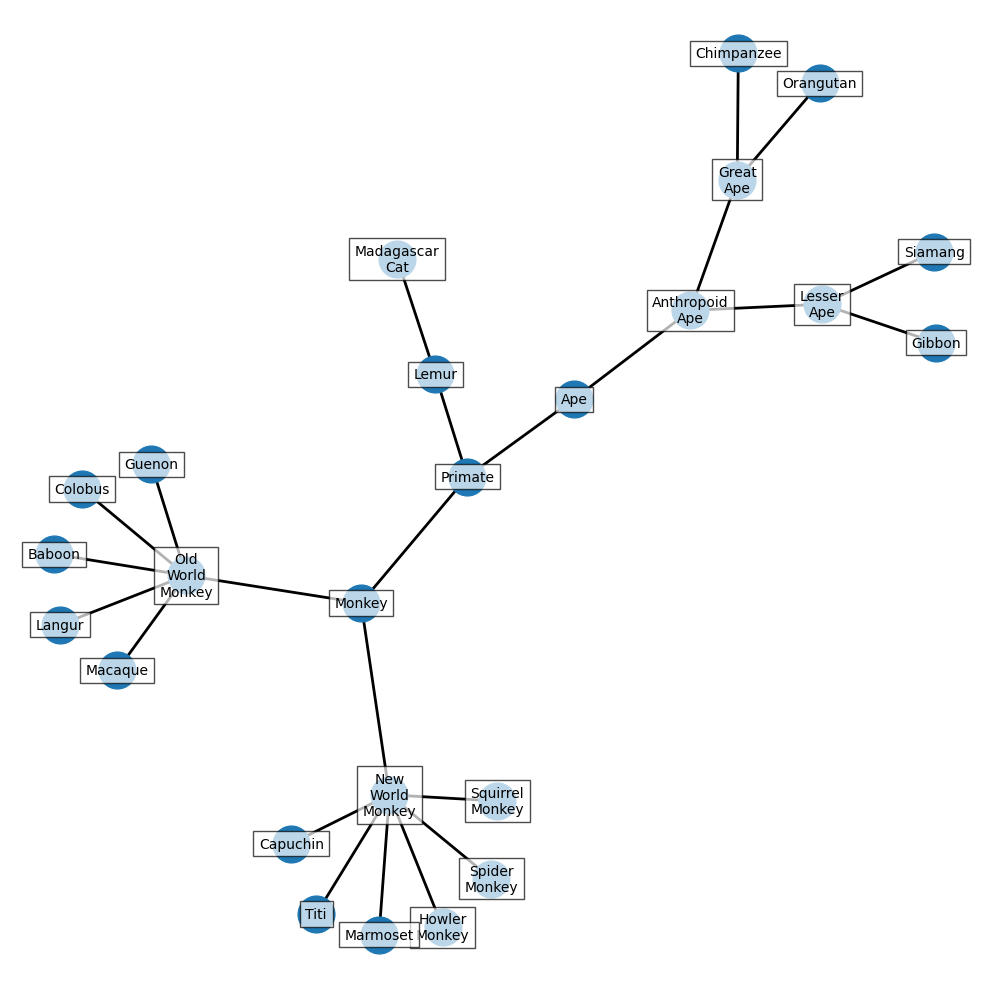

In [58]:
from networkx.drawing.nx_agraph import graphviz_layout

pos = nx.spring_layout(graph, seed=8, iterations=200, scale=3, weight="weight")
# pos = nx.nx_agraph.graphviz_layout(graph, prog="twopi", root=0)

# pos = graphviz_layout(graph)

fig, ax = plt.subplots(figsize=(10, 10))

# nx.draw(graph, pos=pos, node_size=100,  cmap=plt.cm.Blues)

elarge = [(u, v) for (u, v, d) in graph.edges(data=True)]

# nodes
nx.draw_networkx_nodes(graph, pos, node_size=700)

# edges
nx.draw_networkx_edges(graph, pos, edgelist=elarge, width=2)

# pos=nx.graphviz_layout(graph)
nx.draw_networkx_labels(graph, pos=pos, labels=labels, font_size=10,  bbox={"ec": "k", "fc": "white", "alpha": 0.7})


edge_labels = nx.get_edge_attributes(graph, "name")
nx.draw_networkx_edge_labels(graph, pos, edge_labels)



# ax = plt.gca()
# ax.margins(0.08)
# plt.axis("off")
ax.margins(0.0, 0.00)
plt.axis("off")
plt.tight_layout()
plt.savefig("/home/kirchheim/primatenet.pdf", bbox_inches=None)
plt.show()

In [31]:
help(nx.spring_layout)

Help on function spring_layout in module networkx.drawing.layout:

spring_layout(G, k=None, pos=None, fixed=None, iterations=50, threshold=0.0001, weight='weight', scale=1, center=None, dim=2, seed=None)
    Position nodes using Fruchterman-Reingold force-directed algorithm.
    
    The algorithm simulates a force-directed representation of the network
    treating edges as springs holding nodes close, while treating nodes
    as repelling objects, sometimes called an anti-gravity force.
    Simulation continues until the positions are close to an equilibrium.
    
    There are some hard-coded values: minimal distance between
    nodes (0.01) and "temperature" of 0.1 to ensure nodes don't fly away.
    During the simulation, `k` helps determine the distance between nodes,
    though `scale` and `center` determine the size and place after
    rescaling occurs at the end of the simulation.
    
    Fixing some nodes doesn't allow them to move in the simulation.
    It also turns off th

In [ ]:
for node in graph.nodes():
    print(node())

In [ ]:
from itertools import combinations

# a1 = list(categories)[0]
# a2 = list(categories)[2]
# # vehicle 

# print(a1, a2)
s1 = wn.synset("deer" + str('.n.01')) 
s2 = wn.synset("bird" + str('.n.01')) 
s3 = wn.synset("frog" + str('.n.01')) 
s4 = wn.synset("car" + str('.n.01')) 

for x, y in combinations([s1, s2, s3, s4], 2):
    print(x.lexname(), y.lexname(), x.lowest_common_hypernyms(y))

for c in categories:
    print(wn.synset(str(c) + str('.n.01')).lexname())
